## **Combinação de Modelos:**
**KNN + Árvore de Decisão + Regressão Logística**


1) Importação e preparação dos dados:

In [1]:
import pandas as pd
url='https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados=pd.read_csv(url)

dados['smoker']=dados['smoker'].map({'yes':1, 'no':0})
dados['charges']=dados['charges']/1000
dados = dados[['bmi','smoker','charges']]
dados.head()

x=dados[['bmi','charges']]
y=dados['smoker']

**Validação: K-FOLD Repetido**

1) Configurando a Validação Cruzada:

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

validacao = RepeatedKFold(n_splits=10, n_repeats = 3)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

2) Regressão Logística:

In [4]:
modelo= LogisticRegression()
medidas = cross_validate(modelo, x, y, cv=validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9327

In [5]:
medidas

{'fit_time': array([0.02015138, 0.01267433, 0.0129621 , 0.01362753, 0.0244801 ,
        0.01328635, 0.01273108, 0.01319003, 0.01334405, 0.01399779,
        0.01366353, 0.01377249, 0.01373005, 0.01408005, 0.01330829,
        0.01481414, 0.01566553, 0.01360369, 0.01370931, 0.0131886 ,
        0.01370239, 0.01387334, 0.01478195, 0.0132072 , 0.01387644,
        0.01351261, 0.01259875, 0.01247811, 0.01335716, 0.0126214 ]),
 'score_time': array([0.00209641, 0.00201249, 0.00208712, 0.00203466, 0.00316501,
        0.00195789, 0.00201201, 0.00195646, 0.00192618, 0.00251079,
        0.00199175, 0.0019691 , 0.00221324, 0.0033524 , 0.00194693,
        0.00193667, 0.00215483, 0.00273275, 0.0019784 , 0.00201607,
        0.00197911, 0.00205421, 0.00199103, 0.00204778, 0.00198364,
        0.00196433, 0.00192356, 0.00200844, 0.00199556, 0.002038  ]),
 'test_score': array([0.95522388, 0.92537313, 0.93283582, 0.92537313, 0.92537313,
        0.91791045, 0.96268657, 0.89552239, 0.93233083, 0.95488722,
    

**3) KNN:**

In [7]:
modelo = KNeighborsClassifier(n_neighbors=25)
medidas = cross_validate(modelo, x, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(),4)

0.9639

**4) Árvore de Decisão:**

In [9]:
modelo=DecisionTreeClassifier(max_depth = 3)
medidas = cross_validate(modelo, x, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(),4)

0.9631

**5) Modelos de classificação com probabilidade: Combinação Soft**

In [10]:
#Analisar qual a propensão do resultado ser 0 e 1 respectivamente: [prop_zero prop_um]
modelo = LogisticRegression()
modelo.fit(x,y)
modelo.predict_proba(x).round(4).tolist()

[[0.8241, 0.1759],
 [0.9997, 0.0003],
 [0.999, 0.001],
 [0.175, 0.825],
 [0.9975, 0.0025],
 [0.9941, 0.0059],
 [0.9972, 0.0028],
 [0.9897, 0.0103],
 [0.9956, 0.0044],
 [0.0533, 0.9467],
 [0.9963, 0.0037],
 [0.0836, 0.9164],
 [0.9997, 0.0003],
 [0.9988, 0.0012],
 [0.1568, 0.8432],
 [0.9956, 0.0044],
 [0.9866, 0.0134],
 [0.9934, 0.0066],
 [0.9991, 0.0009],
 [0.0614, 0.9386],
 [0.9933, 0.0067],
 [0.999, 0.001],
 [0.9998, 0.0002],
 [0.0187, 0.9813],
 [0.9932, 0.0068],
 [0.9178, 0.0822],
 [0.723, 0.277],
 [0.9878, 0.0122],
 [0.9557, 0.0443],
 [0.0455, 0.9545],
 [0.0959, 0.9041],
 [0.9969, 0.0031],
 [0.9964, 0.0036],
 [0.9342, 0.0658],
 [0.0009, 0.9991],
 [0.9866, 0.0134],
 [0.9671, 0.0329],
 [0.9851, 0.0149],
 [0.0364, 0.9636],
 [0.0064, 0.9936],
 [0.9963, 0.0037],
 [0.9996, 0.0004],
 [0.9608, 0.0392],
 [0.9968, 0.0032],
 [0.9995, 0.0005],
 [0.9529, 0.0471],
 [0.9999, 0.0001],
 [0.9996, 0.0004],
 [0.8753, 0.1247],
 [0.0338, 0.9662],
 [0.9998, 0.0002],
 [0.9994, 0.0006],
 [0.3638, 0.6362],
 

**6) Combinação de modelos Hard:**

In [11]:
from sklearn.ensemble import VotingClassifier

reglog = LogisticRegression()
knn = KNeighborsClassifier (n_neighbors=25)
arvore = DecisionTreeClassifier (max_depth=3)

modelos = [('Reg.Log', reglog),
           ('KNN',knn),
           ('Árvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'hard')           
medidas = cross_validate(modelo, x, y, cv=validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(),4)


0.9644

**Região de Decisão:**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names

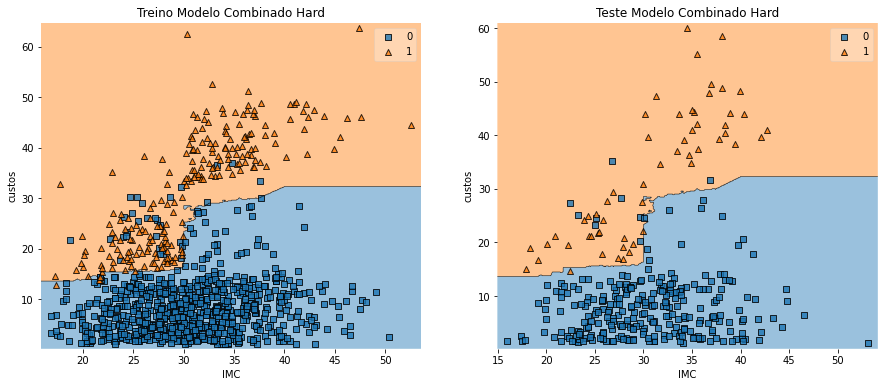

In [12]:
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

xtreino, xteste, ytreino, yteste = train_test_split(x,y,test_size=0.25)
modelo.fit(xtreino,ytreino)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plot_decision_regions(xtreino.values, ytreino.values, clf=modelo, legend=1)
plt.xlabel('IMC')
plt.ylabel('custos')
plt.title('Treino Modelo Combinado Hard')

plt.subplot(1,2,2)
plot_decision_regions(xteste.values, yteste.values, clf=modelo, legend=1)
plt.xlabel('IMC')
plt.ylabel('custos')
plt.title('Teste Modelo Combinado Hard')

plt.show()


**7) Combinação de modelos Soft**

In [13]:
from sklearn.ensemble import VotingClassifier

reglog = LogisticRegression()
knn = KNeighborsClassifier (n_neighbors=25)
arvore = DecisionTreeClassifier (max_depth=3)

modelos = [('Reg.Log', reglog),
           ('KNN',knn),
           ('Árvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'soft')           
medidas = cross_validate(modelo, x, y, cv=validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(),4)

0.9654

**Região de Decisão:**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names

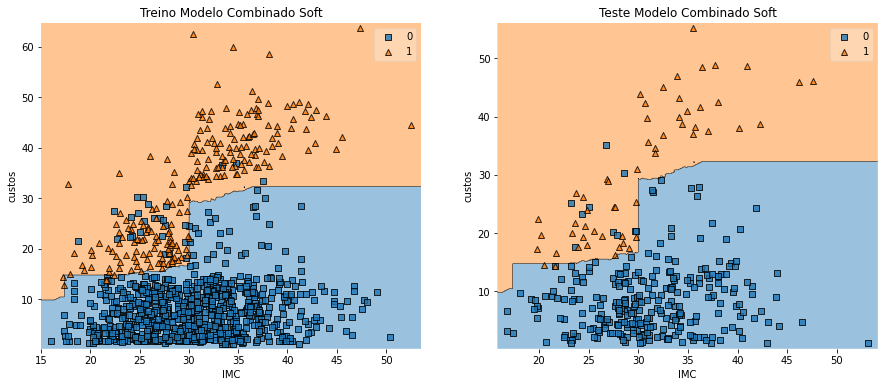

In [14]:
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

xtreino, xteste, ytreino, yteste = train_test_split(x,y,test_size=0.25)
modelo.fit(xtreino,ytreino)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plot_decision_regions(xtreino.values, ytreino.values, clf=modelo, legend=1)
plt.xlabel('IMC')
plt.ylabel('custos')
plt.title('Treino Modelo Combinado Soft')

plt.subplot(1,2,2)
plot_decision_regions(xteste.values, yteste.values, clf=modelo, legend=1)
plt.xlabel('IMC')
plt.ylabel('custos')
plt.title('Teste Modelo Combinado Soft')

plt.show()

**Conclusão**: a combinação Soft apresentou melhores resultados de acurácia quando comparados ao modelo de combinação Hard, quando se utilizou a combinação dos modelos de Árvore de Decisão com profundidade = 3, KNN com K=25 e o modelo de Regressão Logística.
Também foram realizados testes com outros valores de parâmetros, conforme visualizado a seguir:

1) KNN - K=25 => 0.9616
  Árvore - prof=4 => 0.9599
  Árvore - prof=3 => 0.9624
  Combinação Hard = 0.9624
  Combinação Soft = 0.9614

2) KNN - K=35 => 0.9586
  Árvore - prof=4 => 0.9599
  Regressão Logística 
  Combinação Hard = 0.9629
  Combinação Soft = 0.0.9654

3)  KNN - K=25 => 0.9616
  Árvore - prof=4 => 0.9599
  KNN=35 =>0.9594
  Combinação Hard = 0.9611
  Combinação Soft = 0.9644      

---



A **melhor combinação de modelos** que resultou num valor mais satisfatório da acurácia foi KNN com K=25, árvore de decisão com profundidade = 3 e Regressão Logística.